In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
train

id  Gender        Age    Height      Weight  \
0          0    Male  24.443011  1.699998   81.669950   
1          1  Female  18.000000  1.560000   57.000000   
2          2  Female  18.000000  1.711460   50.165754   
3          3  Female  20.952737  1.710730  131.274851   
4          4    Male  31.641081  1.914186   93.798055   
...      ...     ...        ...       ...         ...   
20753  20753    Male  25.137087  1.766626  114.187096   
20754  20754    Male  18.000000  1.710000   50.000000   
20755  20755    Male  20.101026  1.819557  105.580491   
20756  20756    Male  33.852953  1.700000   83.520113   
20757  20757    Male  26.680376  1.816547  118.134898   

      family_history_with_overweight FAVC      FCVC       NCP        CAEC  \
0                                yes  yes  2.000000  2.983297   Sometimes   
1                                yes  yes  2.000000  3.000000  Frequently   
2                                yes  yes  1.880534  1.411685   Sometimes   
3                                yes  yes  3.000000  3.000000   Sometimes   
4                                yes  yes  2.679664  1.971472   Sometimes   
...                              ...  ...       ...       ...         ...   
20753                            yes  yes  2.919584  3.000000   Sometimes   
20754                             no  yes  3.000000  4.000000  Frequently   
20755                            yes  yes  2.407817  3.000000   Sometimes   
20756                            yes  yes  2.671238  1.971472   Sometimes   
20757                            yes  yes  3.000000  3.000000   Sometimes   

      SMOKE      CH2O SCC       FAF       TUE       CALC  \
0        no  2.763573  no  0.000000  0.976473  Sometimes   
1        no  2.000000  no  1.000000  1.000000         no   
2        no  1.910378  no  0.866045  1.673584         no   
3        no  1.674061  no  1.467863  0.780199  Sometimes   
4        no  1.979848  no  1.967973  0.931721  Sometimes   
...     ...       ...  ..       ...       ...        ...   
20753    no  2.151809  no  1.330519  0.196680  Sometimes   
20754    no  1.000000  no  2.000000  1.000000  Sometimes   
20755    no  2.000000  no  1.158040  1.198439         no   
20756    no  2.144838  no  0.000000  0.973834         no   
20757    no  2.003563  no  0.684487  0.713823  Sometimes   

                      MTRANS           NObeyesdad  
0      Public_Transportation  Overweight_Level_II  
1                 Automobile        Normal_Weight  
2      Public_Transportation  Insufficient_Weight  
3      Public_Transportation     Obesity_Type_III  
4      Public_Transportation  Overweight_Level_II  
...                      ...                  ...  
20753  Public_Transportation      Obesity_Type_II  
20754  Public_Transportation  Insufficient_Weight  
20755  Public_Transportation      Obesity_Type_II  
20756             Automobile  Overweight_Level_II  
20757  Public_Transportation      Obesity_Type_II  

[20758 rows x 18 columns]

In [5]:
# train = train.set_index('id')
# test=test.set_index('id')
# train.head()


In [6]:
train.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

## Explore Data

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [8]:
train.describe()

id           Age        Height        Weight          FCVC  \
count  20758.00000  20758.000000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768      2.445908   
std     5992.46278      5.688072      0.087312     26.379443      0.533218   
min        0.00000     14.000000      1.450000     39.000000      1.000000   
25%     5189.25000     20.000000      1.631856     66.000000      2.000000   
50%    10378.50000     22.815416      1.700000     84.064875      2.393837   
75%    15567.75000     26.000000      1.762887    111.600553      3.000000   
max    20757.00000     61.000000      1.975663    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  20758.000000  
mean       2.761332      2.029418      0.981747      0.616756  
std        0.705375      0.608467      0.838302      0.602113  
min        1.000000      1.000000      0.000000      0.000000  
25%        3.000000      1.792022      0.008013      0.000000  
50%        3.000000      2.000000      1.000000      0.573887  
75%        3.000000      2.549617      1.587406      1.000000  
max        4.000000      3.000000      3.000000      2.000000

In [9]:
train.describe(include='O')

Gender family_history_with_overweight   FAVC       CAEC  SMOKE    SCC  \
count    20758                          20758  20758      20758  20758  20758   
unique       2                              2      2          4      2      2   
top     Female                            yes    yes  Sometimes     no     no   
freq     10422                          17014  18982      17529  20513  20071   

             CALC                 MTRANS        NObeyesdad  
count       20758                  20758             20758  
unique          3                      5                 7  
top     Sometimes  Public_Transportation  Obesity_Type_III  
freq        15066                  16687              4046

In [10]:
train.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [11]:
train.duplicated().sum()

np.int64(0)

## check for categorical_Cols

In [12]:
cat_cols=train.select_dtypes(include='object').columns

In [13]:
for col in cat_cols:
    print(col)
    print(train[col].nunique())
    print(train[col].unique())
    print('\n','*'*100,'\n')

Gender
2
['Male' 'Female']

 **************************************************************************************************** 

family_history_with_overweight
2
['yes' 'no']

 **************************************************************************************************** 

FAVC
2
['yes' 'no']

 **************************************************************************************************** 

CAEC
4
['Sometimes' 'Frequently' 'no' 'Always']

 **************************************************************************************************** 

SMOKE
2
['no' 'yes']

 **************************************************************************************************** 

SCC
2
['no' 'yes']

 **************************************************************************************************** 

CALC
3
['Sometimes' 'no' 'Frequently']

 **************************************************************************************************** 

MTRANS
5
['Public_Transportation' 'Automobile

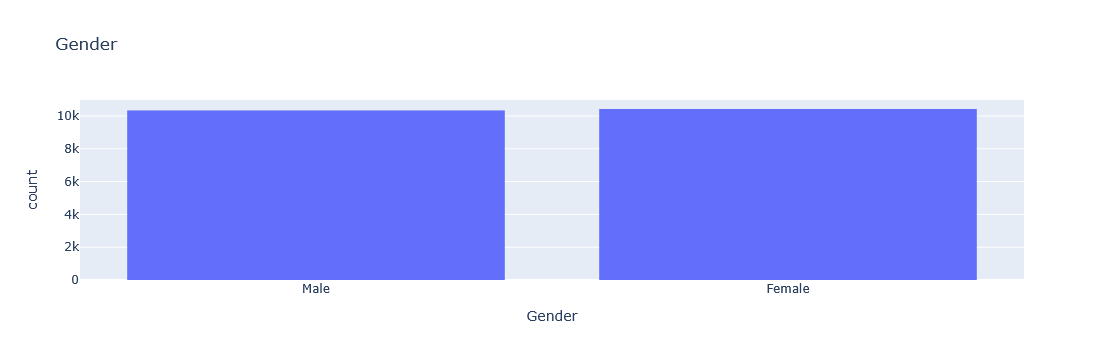

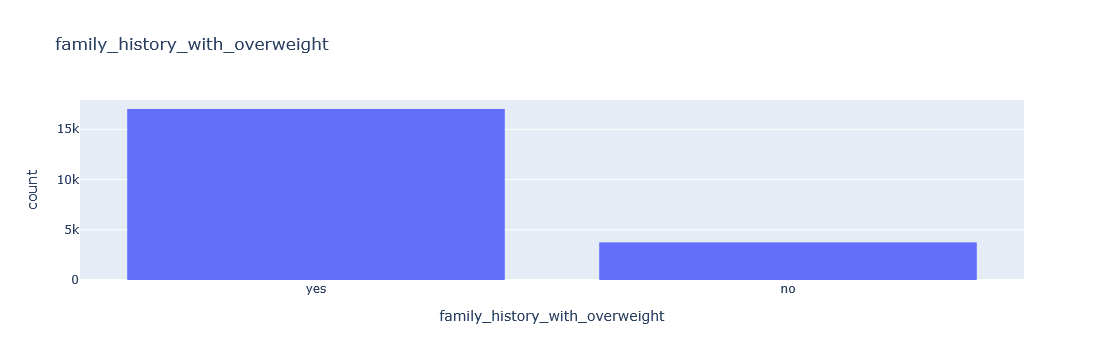

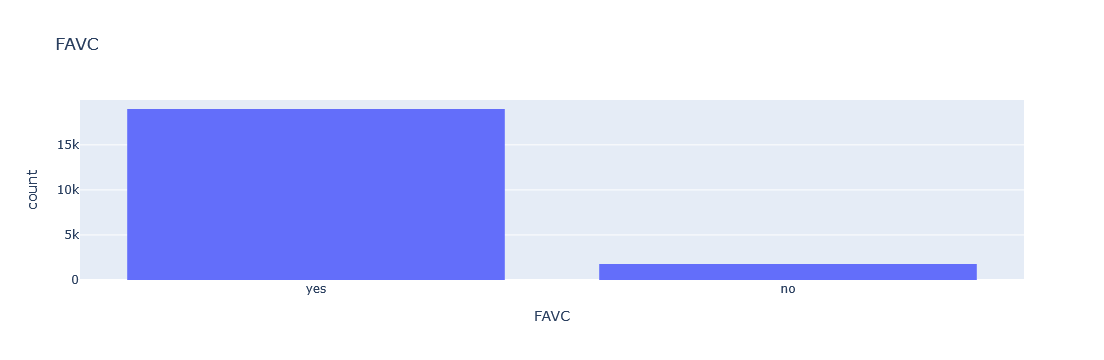

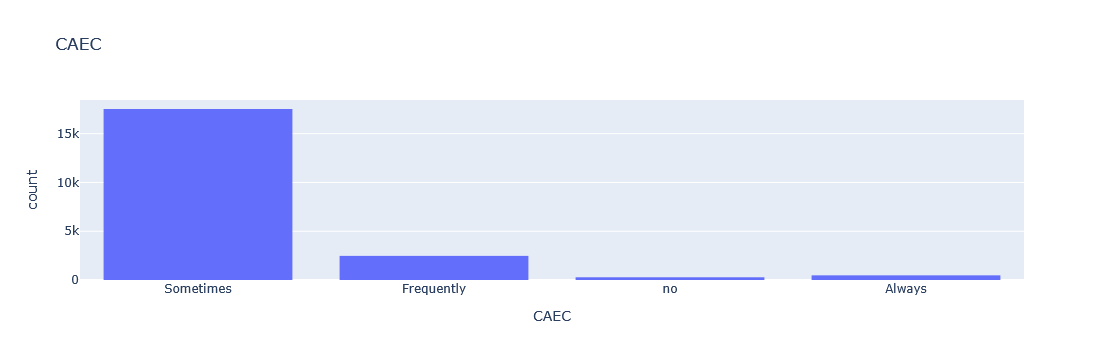

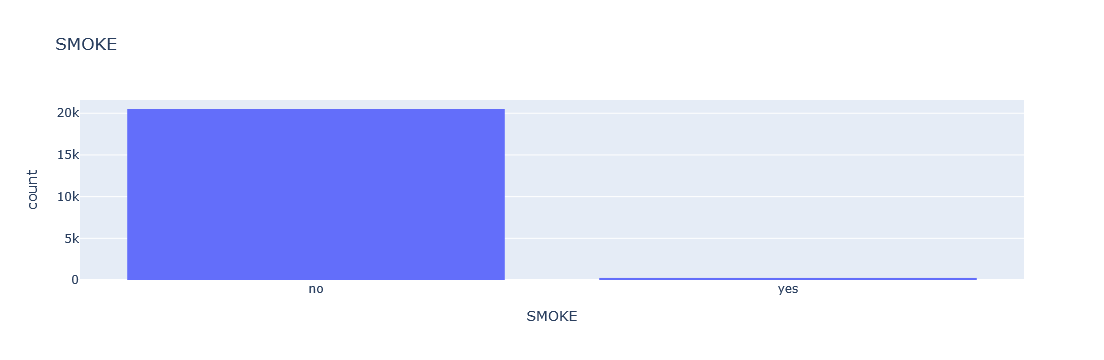

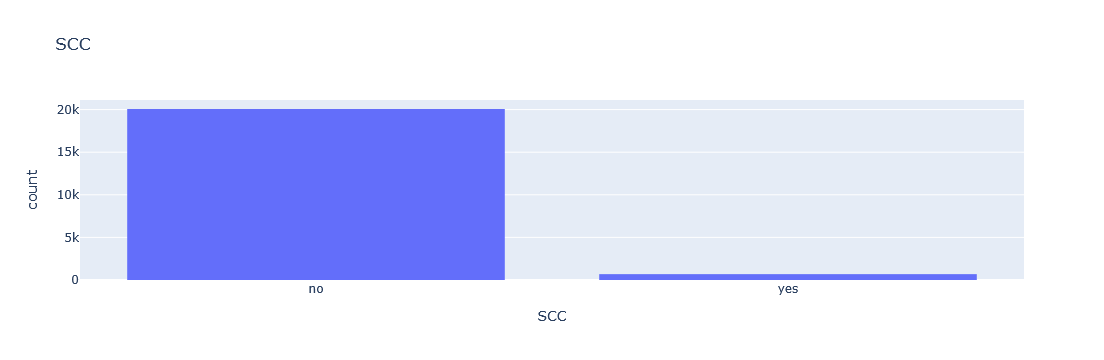

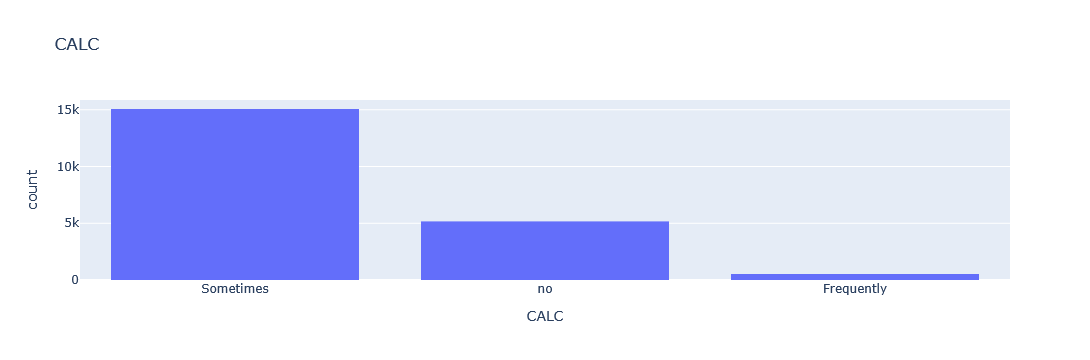

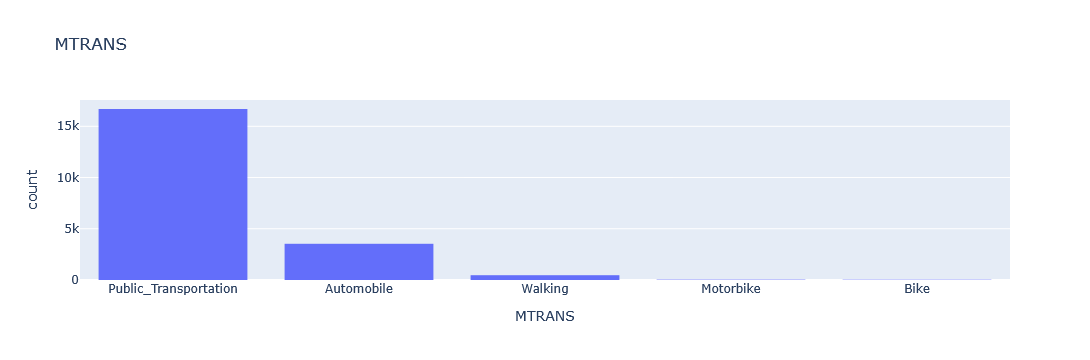

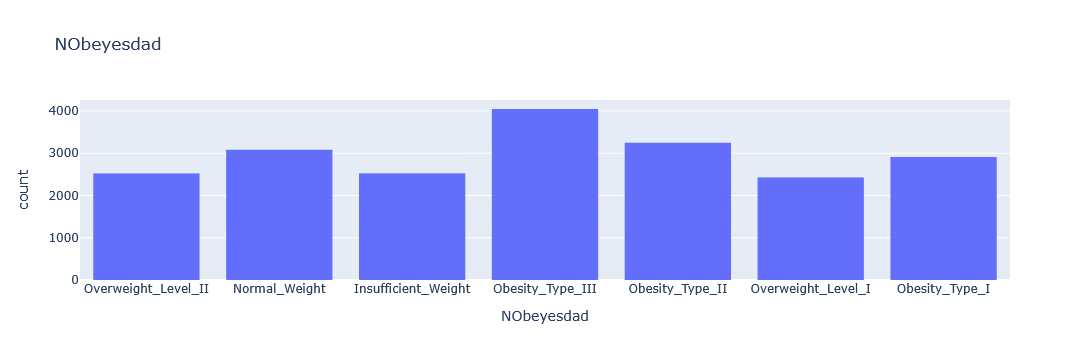

In [14]:
for col in cat_cols:
    px.histogram(train,x=col,title=col).show()

## check for numberical_cols

In [15]:
num_cols=train.select_dtypes(include='number').columns
for col in num_cols:
    print(col)
    print(train[col].unique())
    print(train[col].nunique())
    print('\n','*'*100,'\n')

id
[    0     1     2 ... 20755 20756 20757]
20758

 **************************************************************************************************** 

Age
[24.443011 18.       20.952737 ... 25.746113 38.08886  33.852953]
1703

 **************************************************************************************************** 

Height
[1.699998 1.56     1.71146  ... 1.791366 1.672594 1.536819]
1833

 **************************************************************************************************** 

Weight
[ 81.66995   57.        50.165754 ... 152.063947  79.5       80.615325]
1979

 **************************************************************************************************** 

FCVC
[2.         1.880534   3.         2.679664   2.919751   1.99124
 1.397468   2.636719   1.         1.392665   2.203962   2.971588
 2.668949   1.98989905 2.417635   2.219186   2.919526   2.263245
 2.649406   1.754401   2.303656   2.020785   2.068834   2.689929
 2.979383   2.225731   2.843456   

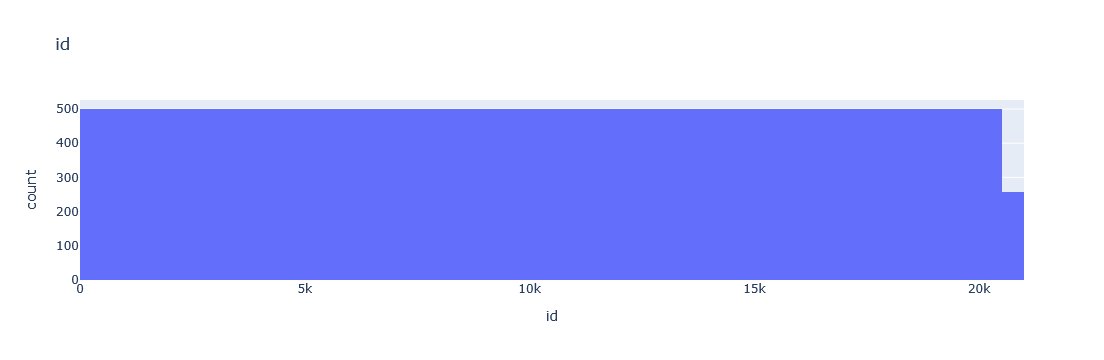

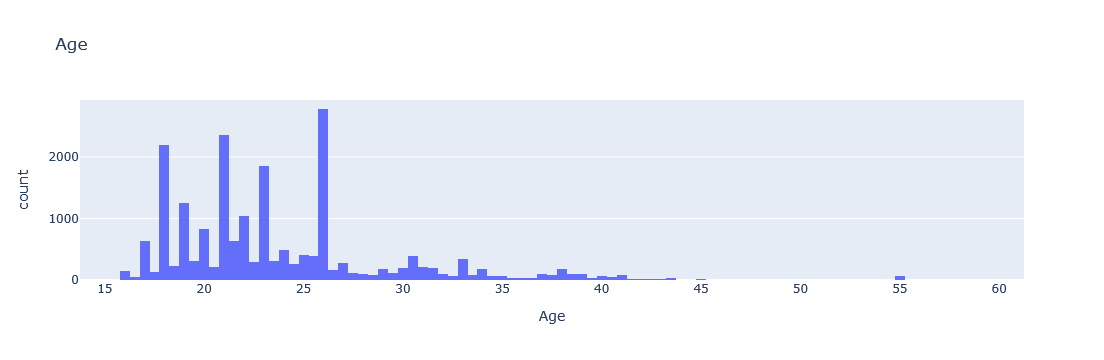

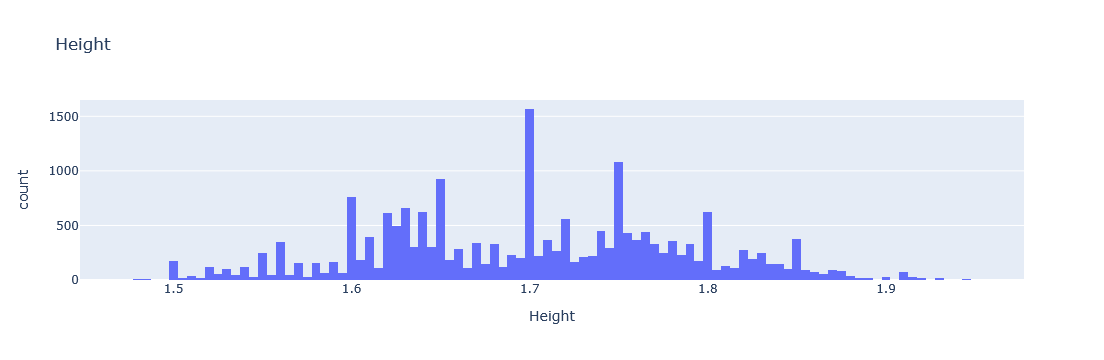

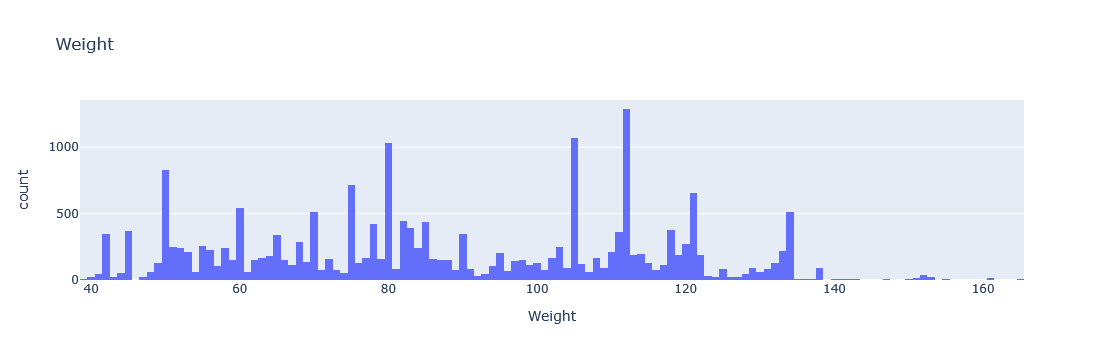

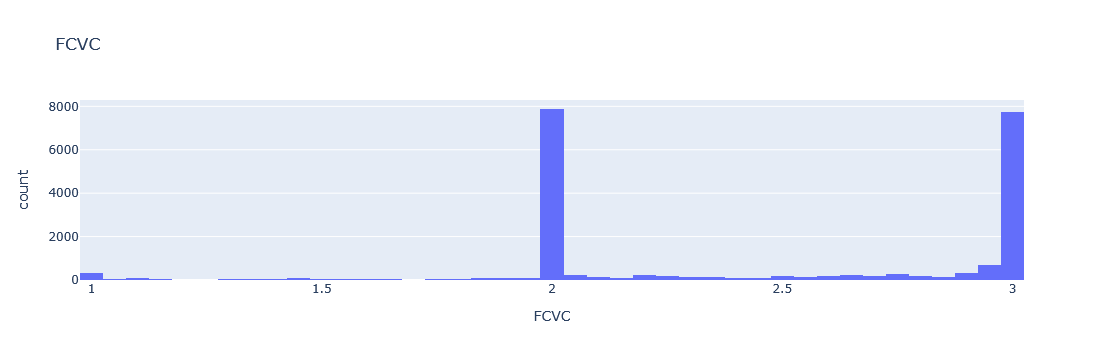

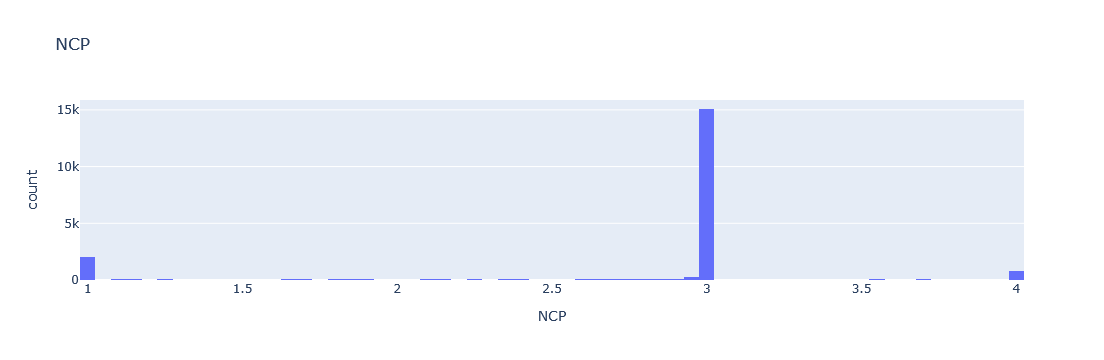

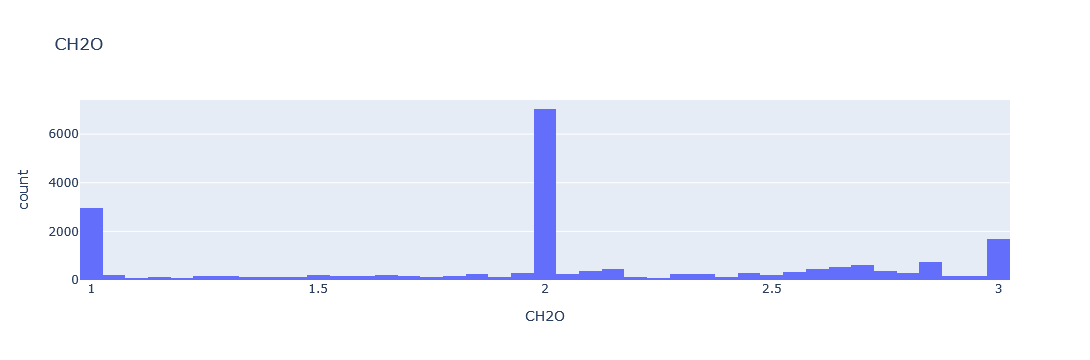

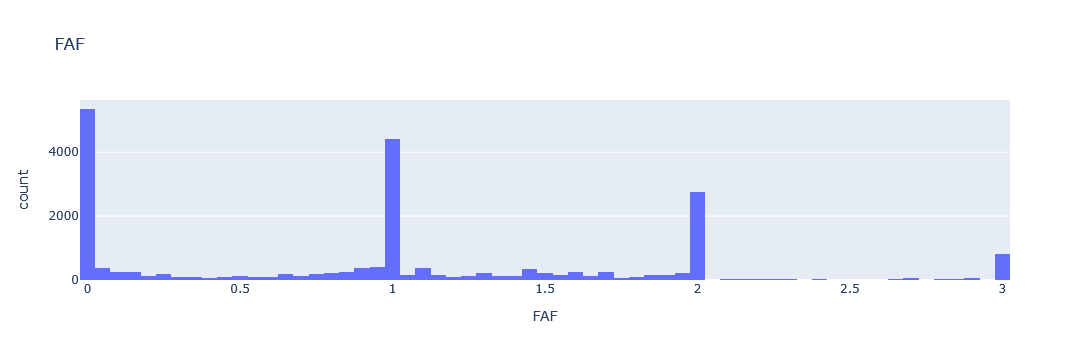

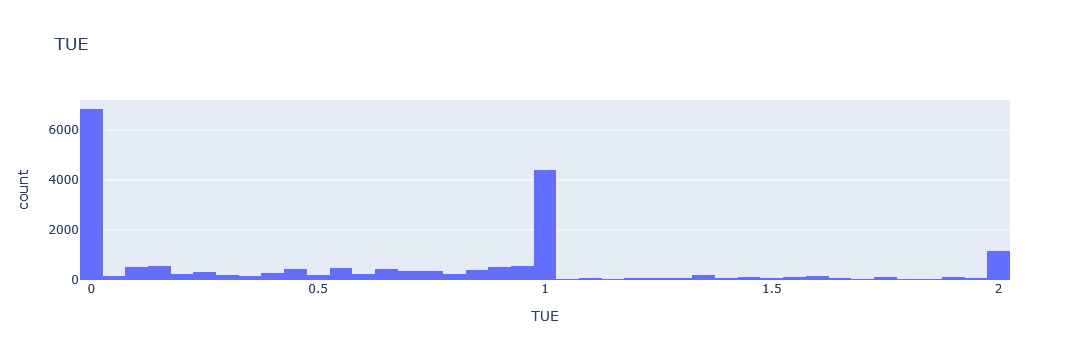

In [16]:
for col in num_cols:
    px.histogram(train,x=col,title=col).show()

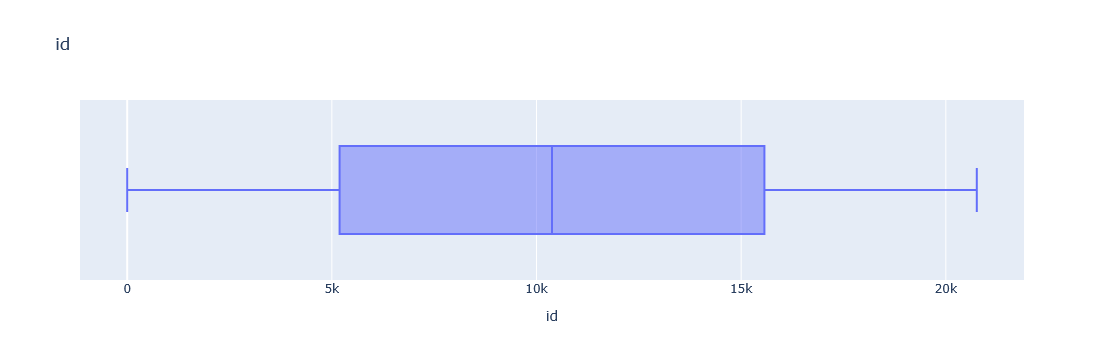

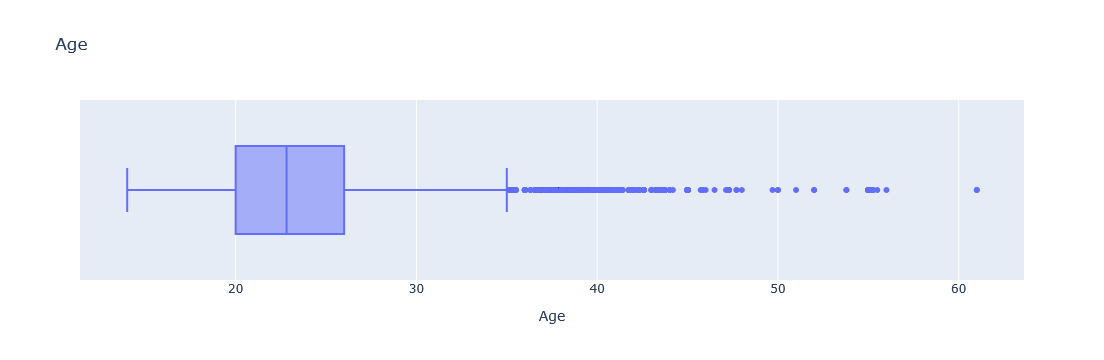

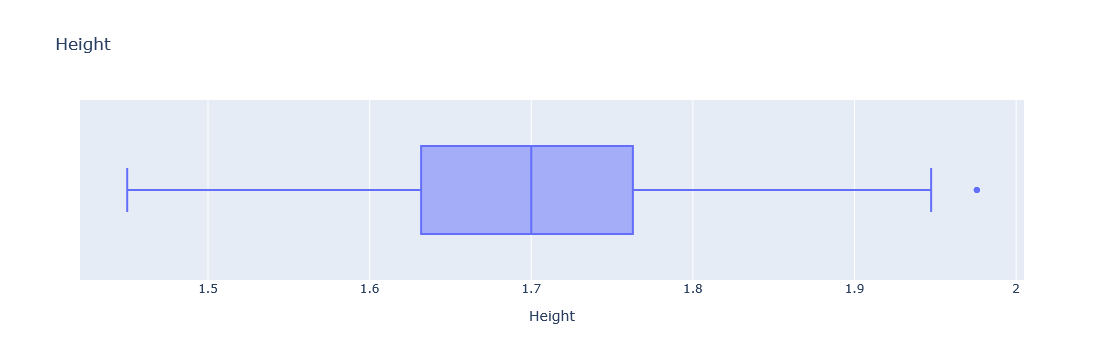

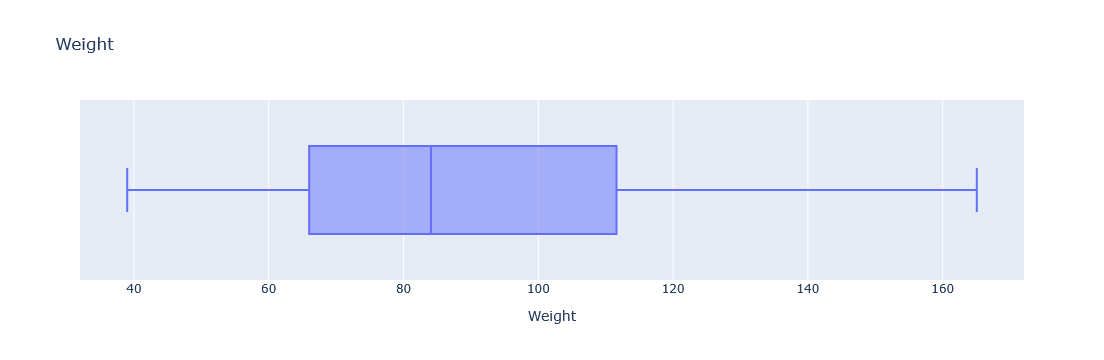

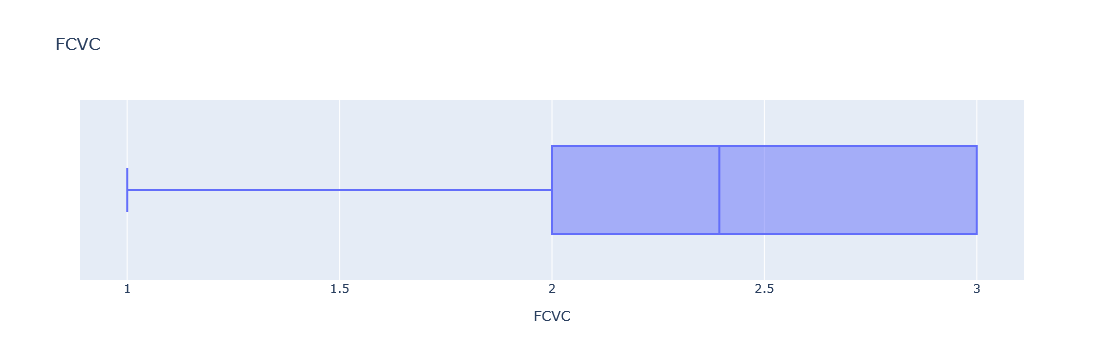

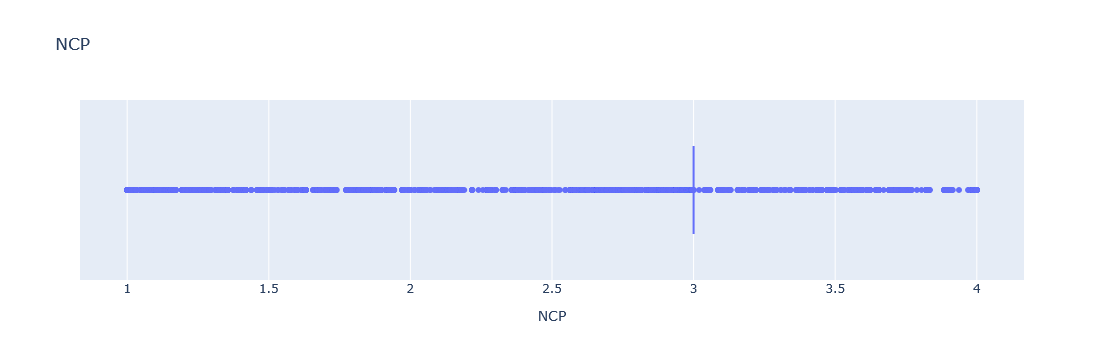

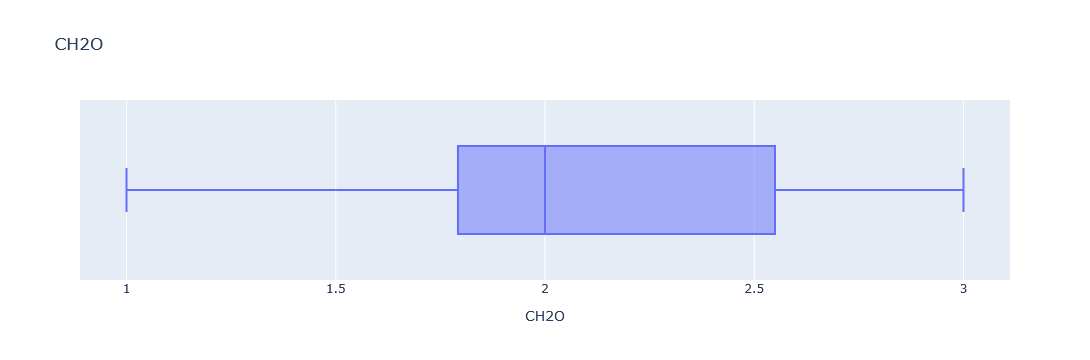

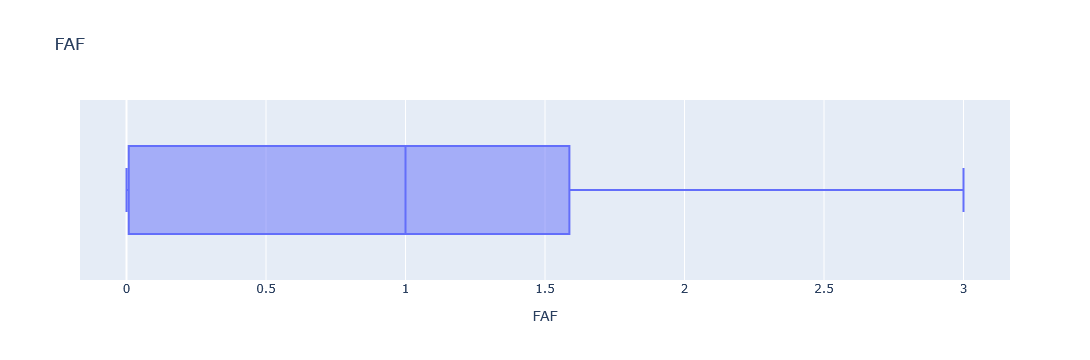

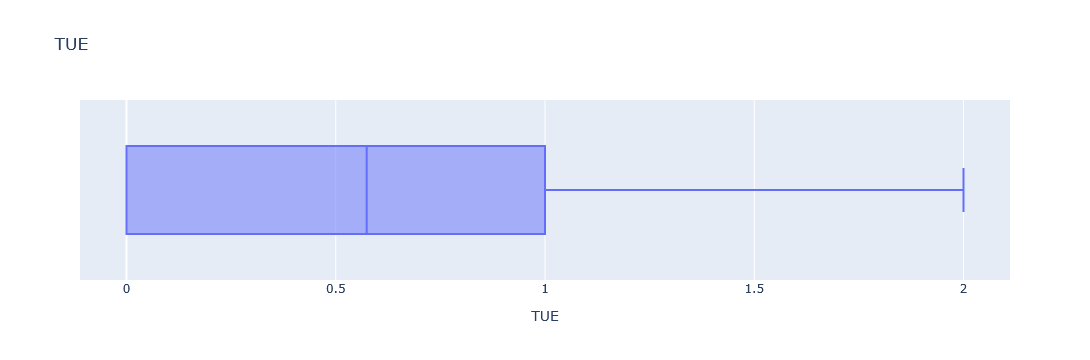

In [17]:
num_cols=train.select_dtypes(include='number').columns
for col in num_cols:
    px.box(train,x=col,title=col).show()

## Data Cleanning 

In [18]:
train.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [19]:
q1=train['Age'].quantile(.25)
q3=train['Age'].quantile(.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
train['Age'] = np.where(train['Age'] > upper_limit, upper_limit,
                 np.where(train['Age'] < lower_limit, lower_limit, train['Age']))
test['Age'] = np.where(test['Age'] > upper_limit, upper_limit,
                np.where(test['Age'] < lower_limit, lower_limit, test['Age']))

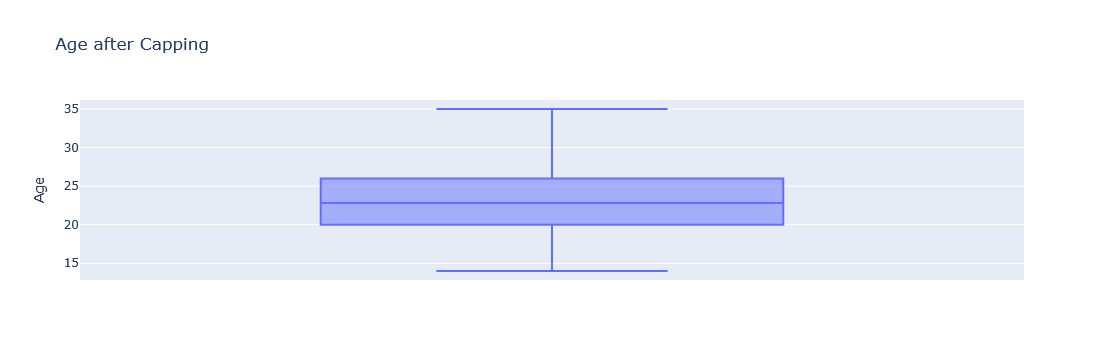

In [20]:
import plotly.express as px
px.box(train, y='Age', title='Age after Capping')


## encoding with categoricla Data

In [21]:
for col in cat_cols:
    print(col)
    print(train[col].unique())
    print('\n','*'*100,'\n')

Gender
['Male' 'Female']

 **************************************************************************************************** 

family_history_with_overweight
['yes' 'no']

 **************************************************************************************************** 

FAVC
['yes' 'no']

 **************************************************************************************************** 

CAEC
['Sometimes' 'Frequently' 'no' 'Always']

 **************************************************************************************************** 

SMOKE
['no' 'yes']

 **************************************************************************************************** 

SCC
['no' 'yes']

 **************************************************************************************************** 

CALC
['Sometimes' 'no' 'Frequently']

 **************************************************************************************************** 

MTRANS
['Public_Transportation' 'Automobile' 'Walking' 'Mot

In [22]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first',sparse_output=False)
ohe_cols=['Gender','family_history_with_overweight','FAVC','SMOKE','SCC','MTRANS']
encoded_array=ohe.fit_transform(train[ohe_cols])
encoded_array 

array([[1., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [1., 1., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 1., 0.]], shape=(20758, 9))

In [23]:
encoded_df=pd.DataFrame(
    encoded_array,columns=ohe.get_feature_names_out(ohe_cols),index=train.index
)
encoded_df

Gender_Male  family_history_with_overweight_yes  FAVC_yes  SMOKE_yes  \
0              1.0                                 1.0       1.0        0.0   
1              0.0                                 1.0       1.0        0.0   
2              0.0                                 1.0       1.0        0.0   
3              0.0                                 1.0       1.0        0.0   
4              1.0                                 1.0       1.0        0.0   
...            ...                                 ...       ...        ...   
20753          1.0                                 1.0       1.0        0.0   
20754          1.0                                 0.0       1.0        0.0   
20755          1.0                                 1.0       1.0        0.0   
20756          1.0                                 1.0       1.0        0.0   
20757          1.0                                 1.0       1.0        0.0   

       SCC_yes  MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  \
0          0.0          0.0               0.0                           1.0   
1          0.0          0.0               0.0                           0.0   
2          0.0          0.0               0.0                           1.0   
3          0.0          0.0               0.0                           1.0   
4          0.0          0.0               0.0                           1.0   
...        ...          ...               ...                           ...   
20753      0.0          0.0               0.0                           1.0   
20754      0.0          0.0               0.0                           1.0   
20755      0.0          0.0               0.0                           1.0   
20756      0.0          0.0               0.0                           0.0   
20757      0.0          0.0               0.0                           1.0   

       MTRANS_Walking  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...               ...  
20753             0.0  
20754             0.0  
20755             0.0  
20756             0.0  
20757             0.0  

[20758 rows x 9 columns]

In [24]:
train=pd.concat([train.drop(columns=ohe_cols),encoded_df],axis=1)
train

id        Age    Height      Weight      FCVC       NCP        CAEC  \
0          0  24.443011  1.699998   81.669950  2.000000  2.983297   Sometimes   
1          1  18.000000  1.560000   57.000000  2.000000  3.000000  Frequently   
2          2  18.000000  1.711460   50.165754  1.880534  1.411685   Sometimes   
3          3  20.952737  1.710730  131.274851  3.000000  3.000000   Sometimes   
4          4  31.641081  1.914186   93.798055  2.679664  1.971472   Sometimes   
...      ...        ...       ...         ...       ...       ...         ...   
20753  20753  25.137087  1.766626  114.187096  2.919584  3.000000   Sometimes   
20754  20754  18.000000  1.710000   50.000000  3.000000  4.000000  Frequently   
20755  20755  20.101026  1.819557  105.580491  2.407817  3.000000   Sometimes   
20756  20756  33.852953  1.700000   83.520113  2.671238  1.971472   Sometimes   
20757  20757  26.680376  1.816547  118.134898  3.000000  3.000000   Sometimes   

           CH2O       FAF       TUE  ...           NObeyesdad Gender_Male  \
0      2.763573  0.000000  0.976473  ...  Overweight_Level_II         1.0   
1      2.000000  1.000000  1.000000  ...        Normal_Weight         0.0   
2      1.910378  0.866045  1.673584  ...  Insufficient_Weight         0.0   
3      1.674061  1.467863  0.780199  ...     Obesity_Type_III         0.0   
4      1.979848  1.967973  0.931721  ...  Overweight_Level_II         1.0   
...         ...       ...       ...  ...                  ...         ...   
20753  2.151809  1.330519  0.196680  ...      Obesity_Type_II         1.0   
20754  1.000000  2.000000  1.000000  ...  Insufficient_Weight         1.0   
20755  2.000000  1.158040  1.198439  ...      Obesity_Type_II         1.0   
20756  2.144838  0.000000  0.973834  ...  Overweight_Level_II         1.0   
20757  2.003563  0.684487  0.713823  ...      Obesity_Type_II         1.0   

       family_history_with_overweight_yes  FAVC_yes  SMOKE_yes  SCC_yes  \
0                                     1.0       1.0        0.0      0.0   
1                                     1.0       1.0        0.0      0.0   
2                                     1.0       1.0        0.0      0.0   
3                                     1.0       1.0        0.0      0.0   
4                                     1.0       1.0        0.0      0.0   
...                                   ...       ...        ...      ...   
20753                                 1.0       1.0        0.0      0.0   
20754                                 0.0       1.0        0.0      0.0   
20755                                 1.0       1.0        0.0      0.0   
20756                                 1.0       1.0        0.0      0.0   
20757                                 1.0       1.0        0.0      0.0   

       MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  \
0              0.0               0.0                           1.0   
1              0.0               0.0                           0.0   
2              0.0               0.0                           1.0   
3              0.0               0.0                           1.0   
4              0.0               0.0                           1.0   
...            ...               ...                           ...   
20753          0.0               0.0                           1.0   
20754          0.0               0.0                           1.0   
20755          0.0               0.0                           1.0   
20756          0.0               0.0                           0.0   
20757          0.0               0.0                           1.0   

       MTRANS_Walking  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...               ...  
20753             0.0  
20754             0.0  
20755             0.0  
20756             0.0  
20757             0.0  

[20758 rows x 21 columns]

In [25]:
train

id        Age    Height      Weight      FCVC       NCP        CAEC  \
0          0  24.443011  1.699998   81.669950  2.000000  2.983297   Sometimes   
1          1  18.000000  1.560000   57.000000  2.000000  3.000000  Frequently   
2          2  18.000000  1.711460   50.165754  1.880534  1.411685   Sometimes   
3          3  20.952737  1.710730  131.274851  3.000000  3.000000   Sometimes   
4          4  31.641081  1.914186   93.798055  2.679664  1.971472   Sometimes   
...      ...        ...       ...         ...       ...       ...         ...   
20753  20753  25.137087  1.766626  114.187096  2.919584  3.000000   Sometimes   
20754  20754  18.000000  1.710000   50.000000  3.000000  4.000000  Frequently   
20755  20755  20.101026  1.819557  105.580491  2.407817  3.000000   Sometimes   
20756  20756  33.852953  1.700000   83.520113  2.671238  1.971472   Sometimes   
20757  20757  26.680376  1.816547  118.134898  3.000000  3.000000   Sometimes   

           CH2O       FAF       TUE  ...           NObeyesdad Gender_Male  \
0      2.763573  0.000000  0.976473  ...  Overweight_Level_II         1.0   
1      2.000000  1.000000  1.000000  ...        Normal_Weight         0.0   
2      1.910378  0.866045  1.673584  ...  Insufficient_Weight         0.0   
3      1.674061  1.467863  0.780199  ...     Obesity_Type_III         0.0   
4      1.979848  1.967973  0.931721  ...  Overweight_Level_II         1.0   
...         ...       ...       ...  ...                  ...         ...   
20753  2.151809  1.330519  0.196680  ...      Obesity_Type_II         1.0   
20754  1.000000  2.000000  1.000000  ...  Insufficient_Weight         1.0   
20755  2.000000  1.158040  1.198439  ...      Obesity_Type_II         1.0   
20756  2.144838  0.000000  0.973834  ...  Overweight_Level_II         1.0   
20757  2.003563  0.684487  0.713823  ...      Obesity_Type_II         1.0   

       family_history_with_overweight_yes  FAVC_yes  SMOKE_yes  SCC_yes  \
0                                     1.0       1.0        0.0      0.0   
1                                     1.0       1.0        0.0      0.0   
2                                     1.0       1.0        0.0      0.0   
3                                     1.0       1.0        0.0      0.0   
4                                     1.0       1.0        0.0      0.0   
...                                   ...       ...        ...      ...   
20753                                 1.0       1.0        0.0      0.0   
20754                                 0.0       1.0        0.0      0.0   
20755                                 1.0       1.0        0.0      0.0   
20756                                 1.0       1.0        0.0      0.0   
20757                                 1.0       1.0        0.0      0.0   

       MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  \
0              0.0               0.0                           1.0   
1              0.0               0.0                           0.0   
2              0.0               0.0                           1.0   
3              0.0               0.0                           1.0   
4              0.0               0.0                           1.0   
...            ...               ...                           ...   
20753          0.0               0.0                           1.0   
20754          0.0               0.0                           1.0   
20755          0.0               0.0                           1.0   
20756          0.0               0.0                           0.0   
20757          0.0               0.0                           1.0   

       MTRANS_Walking  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...               ...  
20753             0.0  
20754             0.0  
20755             0.0  
20756             0.0  
20757             0.0  

[20758 rows x 21 columns]

In [26]:
test_encoded = ohe.transform(test[ohe_cols])
test_encoded = pd.DataFrame(
    test_encoded,
    columns=ohe.get_feature_names_out(ohe_cols),
    index=test.index
)
test = pd.concat([test.drop(columns=ohe_cols), test_encoded], axis=1)


In [27]:
test

id        Age    Height      Weight      FCVC       NCP        CAEC  \
0      20758  26.899886  1.848294  120.644178  2.938616  3.000000   Sometimes   
1      20759  21.000000  1.600000   66.000000  2.000000  1.000000   Sometimes   
2      20760  26.000000  1.643355  111.600553  3.000000  3.000000   Sometimes   
3      20761  20.979254  1.553127  103.669116  2.000000  2.977909   Sometimes   
4      20762  26.000000  1.627396  104.835346  3.000000  3.000000   Sometimes   
...      ...        ...       ...         ...       ...       ...         ...   
13835  34593  23.327836  1.721384   78.030383  2.813234  3.000000   Sometimes   
13836  34594  29.000000  1.590000   62.000000  3.000000  3.000000   Sometimes   
13837  34595  22.935612  1.585547   44.376637  3.000000  2.273740  Frequently   
13838  34596  21.000000  1.620000   53.000000  2.000000  3.000000   Sometimes   
13839  34597  26.490926  1.812259  120.980508  2.744994  3.000000   Sometimes   

           CH2O       FAF       TUE       CALC  Gender_Male  \
0      2.825629  0.855400  0.000000  Sometimes          1.0   
1      3.000000  1.000000  0.000000  Sometimes          0.0   
2      2.621877  0.000000  0.250502  Sometimes          0.0   
3      2.786417  0.094851  0.000000  Sometimes          1.0   
4      2.653531  0.000000  0.741069  Sometimes          0.0   
...         ...       ...       ...        ...          ...   
13835  1.000000  0.807076  0.778632  Sometimes          1.0   
13836  2.000000  0.000000  0.000000  Sometimes          0.0   
13837  2.000000  1.949840  1.000000  Sometimes          0.0   
13838  2.000000  3.000000  2.000000         no          1.0   
13839  2.205977  1.304291  0.630866  Sometimes          1.0   

       family_history_with_overweight_yes  FAVC_yes  SMOKE_yes  SCC_yes  \
0                                     1.0       1.0        0.0      0.0   
1                                     1.0       1.0        0.0      0.0   
2                                     1.0       1.0        0.0      0.0   
3                                     1.0       1.0        0.0      0.0   
4                                     1.0       1.0        0.0      0.0   
...                                   ...       ...        ...      ...   
13835                                 1.0       0.0        0.0      0.0   
13836                                 0.0       1.0        0.0      0.0   
13837                                 0.0       1.0        0.0      0.0   
13838                                 1.0       1.0        0.0      0.0   
13839                                 1.0       1.0        0.0      0.0   

       MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  \
0              0.0               0.0                           1.0   
1              0.0               0.0                           1.0   
2              0.0               0.0                           1.0   
3              0.0               0.0                           1.0   
4              0.0               0.0                           1.0   
...            ...               ...                           ...   
13835          0.0               0.0                           1.0   
13836          0.0               0.0                           1.0   
13837          0.0               0.0                           1.0   
13838          0.0               0.0                           1.0   
13839          0.0               0.0                           1.0   

       MTRANS_Walking  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...               ...  
13835             0.0  
13836             0.0  
13837             0.0  
13838             0.0  
13839             0.0  

[13840 rows x 20 columns]

In [28]:
ordinal_map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}

for col in ['CAEC', 'CALC']:
    train[col] = train[col].map(ordinal_map)
    test[col]  = test[col].map(ordinal_map)


In [29]:
train

id        Age    Height      Weight      FCVC       NCP  CAEC  \
0          0  24.443011  1.699998   81.669950  2.000000  2.983297     1   
1          1  18.000000  1.560000   57.000000  2.000000  3.000000     2   
2          2  18.000000  1.711460   50.165754  1.880534  1.411685     1   
3          3  20.952737  1.710730  131.274851  3.000000  3.000000     1   
4          4  31.641081  1.914186   93.798055  2.679664  1.971472     1   
...      ...        ...       ...         ...       ...       ...   ...   
20753  20753  25.137087  1.766626  114.187096  2.919584  3.000000     1   
20754  20754  18.000000  1.710000   50.000000  3.000000  4.000000     2   
20755  20755  20.101026  1.819557  105.580491  2.407817  3.000000     1   
20756  20756  33.852953  1.700000   83.520113  2.671238  1.971472     1   
20757  20757  26.680376  1.816547  118.134898  3.000000  3.000000     1   

           CH2O       FAF       TUE  ...           NObeyesdad Gender_Male  \
0      2.763573  0.000000  0.976473  ...  Overweight_Level_II         1.0   
1      2.000000  1.000000  1.000000  ...        Normal_Weight         0.0   
2      1.910378  0.866045  1.673584  ...  Insufficient_Weight         0.0   
3      1.674061  1.467863  0.780199  ...     Obesity_Type_III         0.0   
4      1.979848  1.967973  0.931721  ...  Overweight_Level_II         1.0   
...         ...       ...       ...  ...                  ...         ...   
20753  2.151809  1.330519  0.196680  ...      Obesity_Type_II         1.0   
20754  1.000000  2.000000  1.000000  ...  Insufficient_Weight         1.0   
20755  2.000000  1.158040  1.198439  ...      Obesity_Type_II         1.0   
20756  2.144838  0.000000  0.973834  ...  Overweight_Level_II         1.0   
20757  2.003563  0.684487  0.713823  ...      Obesity_Type_II         1.0   

       family_history_with_overweight_yes  FAVC_yes  SMOKE_yes  SCC_yes  \
0                                     1.0       1.0        0.0      0.0   
1                                     1.0       1.0        0.0      0.0   
2                                     1.0       1.0        0.0      0.0   
3                                     1.0       1.0        0.0      0.0   
4                                     1.0       1.0        0.0      0.0   
...                                   ...       ...        ...      ...   
20753                                 1.0       1.0        0.0      0.0   
20754                                 0.0       1.0        0.0      0.0   
20755                                 1.0       1.0        0.0      0.0   
20756                                 1.0       1.0        0.0      0.0   
20757                                 1.0       1.0        0.0      0.0   

       MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  \
0              0.0               0.0                           1.0   
1              0.0               0.0                           0.0   
2              0.0               0.0                           1.0   
3              0.0               0.0                           1.0   
4              0.0               0.0                           1.0   
...            ...               ...                           ...   
20753          0.0               0.0                           1.0   
20754          0.0               0.0                           1.0   
20755          0.0               0.0                           1.0   
20756          0.0               0.0                           0.0   
20757          0.0               0.0                           1.0   

       MTRANS_Walking  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...               ...  
20753             0.0  
20754             0.0  
20755             0.0  
20756             0.0  
20757             0.0  

[20758 rows x 21 columns]

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['NObeyesdad']=le.fit_transform(train['NObeyesdad'])

In [31]:
train

id        Age    Height      Weight      FCVC       NCP  CAEC  \
0          0  24.443011  1.699998   81.669950  2.000000  2.983297     1   
1          1  18.000000  1.560000   57.000000  2.000000  3.000000     2   
2          2  18.000000  1.711460   50.165754  1.880534  1.411685     1   
3          3  20.952737  1.710730  131.274851  3.000000  3.000000     1   
4          4  31.641081  1.914186   93.798055  2.679664  1.971472     1   
...      ...        ...       ...         ...       ...       ...   ...   
20753  20753  25.137087  1.766626  114.187096  2.919584  3.000000     1   
20754  20754  18.000000  1.710000   50.000000  3.000000  4.000000     2   
20755  20755  20.101026  1.819557  105.580491  2.407817  3.000000     1   
20756  20756  33.852953  1.700000   83.520113  2.671238  1.971472     1   
20757  20757  26.680376  1.816547  118.134898  3.000000  3.000000     1   

           CH2O       FAF       TUE  ...  NObeyesdad  Gender_Male  \
0      2.763573  0.000000  0.976473  ...           6          1.0   
1      2.000000  1.000000  1.000000  ...           1          0.0   
2      1.910378  0.866045  1.673584  ...           0          0.0   
3      1.674061  1.467863  0.780199  ...           4          0.0   
4      1.979848  1.967973  0.931721  ...           6          1.0   
...         ...       ...       ...  ...         ...          ...   
20753  2.151809  1.330519  0.196680  ...           3          1.0   
20754  1.000000  2.000000  1.000000  ...           0          1.0   
20755  2.000000  1.158040  1.198439  ...           3          1.0   
20756  2.144838  0.000000  0.973834  ...           6          1.0   
20757  2.003563  0.684487  0.713823  ...           3          1.0   

       family_history_with_overweight_yes  FAVC_yes  SMOKE_yes  SCC_yes  \
0                                     1.0       1.0        0.0      0.0   
1                                     1.0       1.0        0.0      0.0   
2                                     1.0       1.0        0.0      0.0   
3                                     1.0       1.0        0.0      0.0   
4                                     1.0       1.0        0.0      0.0   
...                                   ...       ...        ...      ...   
20753                                 1.0       1.0        0.0      0.0   
20754                                 0.0       1.0        0.0      0.0   
20755                                 1.0       1.0        0.0      0.0   
20756                                 1.0       1.0        0.0      0.0   
20757                                 1.0       1.0        0.0      0.0   

       MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  \
0              0.0               0.0                           1.0   
1              0.0               0.0                           0.0   
2              0.0               0.0                           1.0   
3              0.0               0.0                           1.0   
4              0.0               0.0                           1.0   
...            ...               ...                           ...   
20753          0.0               0.0                           1.0   
20754          0.0               0.0                           1.0   
20755          0.0               0.0                           1.0   
20756          0.0               0.0                           0.0   
20757          0.0               0.0                           1.0   

       MTRANS_Walking  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...               ...  
20753             0.0  
20754             0.0  
20755             0.0  
20756             0.0  
20757             0.0  

[20758 rows x 21 columns]

## spliting 

In [32]:
train.columns

Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF',
       'TUE', 'CALC', 'NObeyesdad', 'Gender_Male',
       'family_history_with_overweight_yes', 'FAVC_yes', 'SMOKE_yes',
       'SCC_yes', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [33]:
print(train.columns)

Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF',
       'TUE', 'CALC', 'NObeyesdad', 'Gender_Male',
       'family_history_with_overweight_yes', 'FAVC_yes', 'SMOKE_yes',
       'SCC_yes', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')


In [34]:
test.isna().sum()

id                                    0
Age                                   0
Height                                0
Weight                                0
FCVC                                  0
NCP                                   0
CAEC                                  0
CH2O                                  0
FAF                                   0
TUE                                   0
CALC                                  0
Gender_Male                           0
family_history_with_overweight_yes    0
FAVC_yes                              0
SMOKE_yes                             0
SCC_yes                               0
MTRANS_Bike                           0
MTRANS_Motorbike                      0
MTRANS_Public_Transportation          0
MTRANS_Walking                        0
dtype: int64

In [35]:
print(train.select_dtypes(include='object').columns)
print(test.select_dtypes(include='object').columns)


Index([], dtype='object')
Index([], dtype='object')


In [36]:
train.columns

Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF',
       'TUE', 'CALC', 'NObeyesdad', 'Gender_Male',
       'family_history_with_overweight_yes', 'FAVC_yes', 'SMOKE_yes',
       'SCC_yes', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [37]:
test.columns

Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF',
       'TUE', 'CALC', 'Gender_Male', 'family_history_with_overweight_yes',
       'FAVC_yes', 'SMOKE_yes', 'SCC_yes', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [38]:
print(train.select_dtypes(include='object').columns)
print(test.select_dtypes(include='object').columns)


Index([], dtype='object')
Index([], dtype='object')


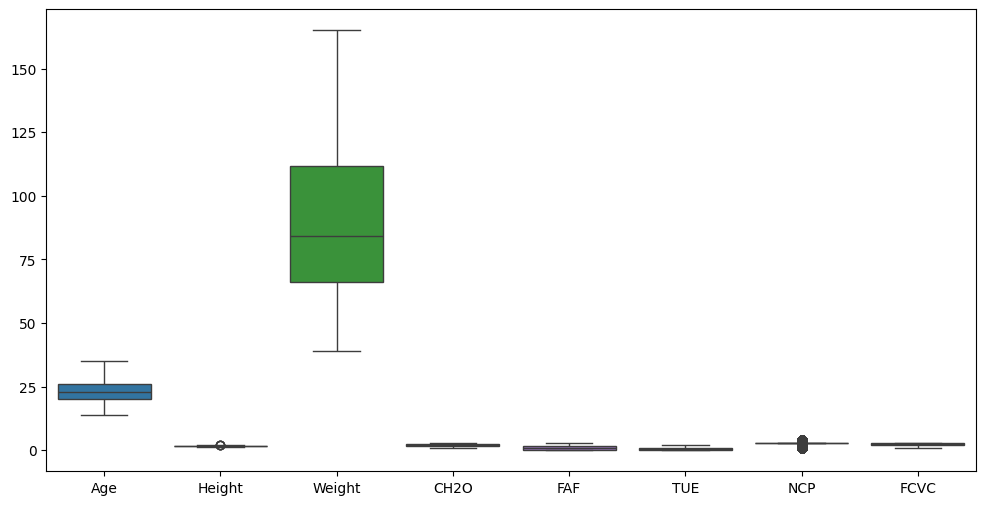

In [39]:
num_cols = ['Age', 'Height', 'Weight', 'CH2O', 'FAF', 'TUE', 'NCP', 'FCVC']
plt.figure(figsize=(12,6))
sns.boxplot(data=train[num_cols])
plt.show()


In [40]:
num_cols

['Age', 'Height', 'Weight', 'CH2O', 'FAF', 'TUE', 'NCP', 'FCVC']

In [41]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
train[num_cols] = scaler.fit_transform(train[num_cols])
test[num_cols]  = scaler.transform(test[num_cols])

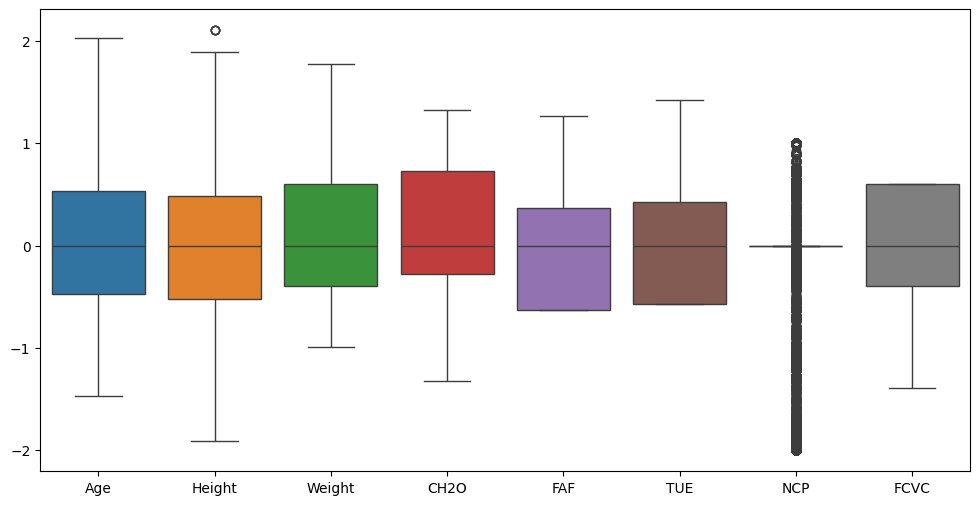

In [42]:
num_cols = ['Age', 'Height', 'Weight', 'CH2O', 'FAF', 'TUE', 'NCP', 'FCVC']
plt.figure(figsize=(12,6))
sns.boxplot(data=train[num_cols])
plt.show()


In [56]:
x = train.drop(columns=['id','NObeyesdad'])
y = train['NObeyesdad']

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [57]:
x_train

Age    Height    Weight      FCVC       NCP  CAEC      CH2O  \
4515  -0.135903  0.076318  0.130155 -0.393837 -2.000000     1  0.000000   
7949   2.030764 -0.457907 -0.154930  0.606163 -2.000000     1  0.000000   
20677 -0.802569  0.763178 -0.615450 -0.393837  1.000000     2  0.000000   
18079 -0.802569  0.000000  0.020507 -0.393837  0.000000     2  0.000000   
5129  -0.013348  1.140379  0.824400 -0.041514 -0.300029     1  0.472519   
...         ...       ...       ...       ...       ...   ...       ...   
9836   0.030764 -1.144767 -0.747028 -0.393837 -2.000000     1 -1.319966   
14825  1.898165 -0.282544 -0.092133 -0.393837 -1.148912     1 -1.222226   
3584  -0.302569 -0.915814 -0.768957 -0.393837  0.000000     1  0.000000   
12333  2.030764 -1.071754 -0.152008 -0.393837 -0.051279     1 -0.625251   
7417  -0.969236  0.000000  0.020507  0.606163  0.000000     1  0.000000   

            FAF       TUE  CALC  Gender_Male  \
4515   0.000000  1.426113     1          1.0   
7949  -0.633155 -0.573887     1          0.0   
20677  0.633155  0.426113     0          1.0   
18079  0.633155  0.426113     2          1.0   
5129   0.433446  0.165722     1          1.0   
...         ...       ...   ...          ...   
9836  -0.633155  0.426113     1          0.0   
14825 -0.073736 -0.573887     1          0.0   
3584   0.633155  0.426113     0          0.0   
12333 -0.633155 -0.573887     1          0.0   
7417   0.633155  0.426113     1          1.0   

       family_history_with_overweight_yes  FAVC_yes  SMOKE_yes  SCC_yes  \
4515                                  1.0       1.0        0.0      0.0   
7949                                  1.0       1.0        0.0      0.0   
20677                                 1.0       1.0        0.0      0.0   
18079                                 1.0       1.0        0.0      0.0   
5129                                  1.0       1.0        0.0      0.0   
...                                   ...       ...        ...      ...   
9836                                  0.0       1.0        0.0      0.0   
14825                                 1.0       1.0        0.0      0.0   
3584                                  1.0       1.0        0.0      0.0   
12333                                 1.0       1.0        0.0      0.0   
7417                                  1.0       0.0        0.0      0.0   

       MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  \
4515           0.0               0.0                           1.0   
7949           0.0               0.0                           0.0   
20677          0.0               0.0                           0.0   
18079          0.0               0.0                           1.0   
5129           0.0               0.0                           1.0   
...            ...               ...                           ...   
9836           0.0               0.0                           1.0   
14825          0.0               0.0                           0.0   
3584           0.0               0.0                           1.0   
12333          0.0               0.0                           0.0   
7417           0.0               0.0                           0.0   

       MTRANS_Walking  
4515              0.0  
7949              0.0  
20677             0.0  
18079             0.0  
5129              0.0  
...               ...  
9836              0.0  
14825             0.0  
3584              0.0  
12333             0.0  
7417              1.0  

[16606 rows x 19 columns]

In [58]:
x_test

Age    Height    Weight      FCVC       NCP  CAEC      CH2O  \
5442  -0.135903 -0.610543 -0.571591 -0.393837  0.000000     1 -1.319966   
275   -0.802569 -1.068449 -0.681239  0.606163  0.000000     2  0.000000   
4921   0.644823  0.820707  0.788041 -0.001172  0.000000     1  0.664204   
9950   0.530764 -0.431799  0.610285  0.606163  0.000000     1  0.953380   
1548   0.030764 -1.071754 -0.153747 -0.393837 -2.000000     1  0.000000   
...         ...       ...       ...       ...       ...   ...       ...   
5217  -0.802569  0.610543 -0.352296 -0.393837  0.000000     1  0.000000   
8356  -0.969236  0.915814 -0.374225  0.606163  0.000000     1  1.319966   
18807 -0.307331 -0.733239 -0.856675  0.606163  0.000000     2 -1.319966   
4851  -1.090830 -0.637506 -0.747028  0.606163  0.000000     1 -0.774533   
15342  1.162614 -1.304577 -0.406621 -0.393837 -0.243378     1 -0.038778   

            FAF       TUE  CALC  Gender_Male  \
5442   0.633155 -0.573887     1          0.0   
275   -0.633155  1.426113     1          0.0   
4921  -0.446261 -0.573887     1          1.0   
9950  -0.633155 -0.472289     1          0.0   
1548   0.555510 -0.573887     1          0.0   
...         ...       ...   ...          ...   
5217   0.633155  0.426113     1          1.0   
8356   1.266309  0.426113     1          1.0   
18807 -0.139220 -0.573887     1          0.0   
4851  -0.130753  0.426113     1          0.0   
15342 -0.633155 -0.573887     0          0.0   

       family_history_with_overweight_yes  FAVC_yes  SMOKE_yes  SCC_yes  \
5442                                  0.0       1.0        0.0      0.0   
275                                   1.0       1.0        0.0      0.0   
4921                                  1.0       1.0        0.0      0.0   
9950                                  1.0       1.0        0.0      0.0   
1548                                  1.0       1.0        0.0      0.0   
...                                   ...       ...        ...      ...   
5217                                  1.0       1.0        0.0      0.0   
8356                                  1.0       0.0        0.0      1.0   
18807                                 0.0       0.0        0.0      1.0   
4851                                  0.0       1.0        0.0      1.0   
15342                                 1.0       1.0        0.0      0.0   

       MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  \
5442           0.0               0.0                           1.0   
275            0.0               0.0                           1.0   
4921           0.0               0.0                           1.0   
9950           0.0               0.0                           1.0   
1548           0.0               0.0                           1.0   
...            ...               ...                           ...   
5217           0.0               0.0                           1.0   
8356           0.0               0.0                           0.0   
18807          0.0               0.0                           1.0   
4851           0.0               0.0                           1.0   
15342          0.0               0.0                           1.0   

       MTRANS_Walking  
5442              0.0  
275               0.0  
4921              0.0  
9950              0.0  
1548              0.0  
...               ...  
5217              0.0  
8356              1.0  
18807             0.0  
4851              0.0  
15342             0.0  

[4152 rows x 19 columns]

In [59]:
model1=LogisticRegression()
model2=RandomForestClassifier()
model3=GaussianNB()
model4=SVC()
model5=XGBClassifier()
model6=GradientBoostingClassifier()

In [60]:
def pred(model):
    model.fit(x_train, y_train)
    pre = model.predict(x_test)
    print(classification_report(pre, y_test))


In [61]:
pred(model1)

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       545
           1       0.81      0.85      0.83       589
           2       0.84      0.80      0.82       609
           3       0.96      0.93      0.95       672
           4       1.00      0.99      1.00       814
           5       0.65      0.73      0.69       436
           6       0.66      0.68      0.67       487

    accuracy                           0.86      4152
   macro avg       0.84      0.84      0.84      4152
weighted avg       0.86      0.86      0.86      4152



In [62]:
pred(model2)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       514
           1       0.87      0.85      0.86       630
           2       0.90      0.88      0.89       595
           3       0.97      0.97      0.97       649
           4       1.00      1.00      1.00       809
           5       0.74      0.81      0.77       440
           6       0.81      0.79      0.80       515

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152



In [63]:
pred(model3)

              precision    recall  f1-score   support

           0       0.85      0.64      0.73       671
           1       0.27      0.61      0.37       269
           2       0.45      0.35      0.39       758
           3       0.97      0.53      0.68      1195
           4       1.00      0.96      0.98       840
           5       0.28      0.53      0.37       253
           6       0.18      0.54      0.27       166

    accuracy                           0.61      4152
   macro avg       0.57      0.59      0.54      4152
weighted avg       0.74      0.61      0.64      4152



In [64]:
pred(model4)

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       521
           1       0.82      0.86      0.84       592
           2       0.88      0.85      0.86       603
           3       0.97      0.96      0.96       656
           4       1.00      1.00      1.00       810
           5       0.69      0.73      0.71       462
           6       0.76      0.75      0.76       508

    accuracy                           0.88      4152
   macro avg       0.86      0.86      0.86      4152
weighted avg       0.88      0.88      0.88      4152



In [65]:
pred(model5)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       506
           1       0.90      0.88      0.89       632
           2       0.88      0.88      0.88       582
           3       0.97      0.97      0.97       653
           4       1.00      1.00      1.00       810
           5       0.77      0.81      0.79       458
           6       0.81      0.80      0.81       511

    accuracy                           0.91      4152
   macro avg       0.90      0.90      0.90      4152
weighted avg       0.91      0.91      0.91      4152



In [66]:
pred(model6) 

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       517
           1       0.88      0.87      0.88       625
           2       0.90      0.88      0.89       592
           3       0.97      0.97      0.97       646
           4       1.00      1.00      1.00       809
           5       0.76      0.82      0.79       449
           6       0.81      0.79      0.80       514

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.91      0.90      0.91      4152



In [67]:
test['id']

0        20758
1        20759
2        20760
3        20761
4        20762
         ...  
13835    34593
13836    34594
13837    34595
13838    34596
13839    34597
Name: id, Length: 13840, dtype: int64

In [70]:
testx = test.drop("id", axis=1)

prex = model5.predict(testx)

submission=pd.DataFrame({"id": test["id"], "NObeyesdad": prex})
submission

id  NObeyesdad
0      20758           3
1      20759           5
2      20760           4
3      20761           2
4      20762           4
...      ...         ...
13835  34593           6
13836  34594           5
13837  34595           0
13838  34596           1
13839  34597           3

[13840 rows x 2 columns]

In [72]:
submission['NObeyesdad']=le.inverse_transform(prex)

In [73]:
submission

id           NObeyesdad
0      20758      Obesity_Type_II
1      20759   Overweight_Level_I
2      20760     Obesity_Type_III
3      20761       Obesity_Type_I
4      20762     Obesity_Type_III
...      ...                  ...
13835  34593  Overweight_Level_II
13836  34594   Overweight_Level_I
13837  34595  Insufficient_Weight
13838  34596        Normal_Weight
13839  34597      Obesity_Type_II

[13840 rows x 2 columns]

In [74]:
submission.to_csv('submission.csv',index=False)